In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#function to get wikipedia table into dataframe
# this function takes 2 inputs 
#url: url of the site we want scrape data from
#className: class of the <table> tag
def getdf(url,className):
    wikiurl=url
    table_class="wikitable sortable jquery-tablesorter"
    response=requests.get(wikiurl)
    #print(response.status_code)
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatable=soup.find('table',{'class':className})
    df=pd.read_html(str(indiatable))
    # convert list to dataframe
    df=pd.DataFrame(df[0])
    return df

    

# List of largest retail companies in the world

In [3]:
#we first get all the information of list of largest retail companies.
df_retail=getdf('https://en.wikipedia.org/wiki/List_of_largest_retail_companies','wikitable')

In [4]:
df_retail.head()

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville",NaN,NaN,NaN,NaN,NaN,NaN
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle",NaN,NaN,NaN,NaN,NaN,NaN
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah",NaN,NaN,NaN,NaN,NaN,NaN
3,4,Schwarz Gruppe,Discount Store,144254,...,"Germany, Neckarsulm",NaN,NaN,NaN,NaN,NaN,NaN
4,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_retail.columns

Index(['Rank', 'Name', 'Dominant operational format',
       'Retail revenue (US$ millions)', 'Net profit margin', 'Headquarters',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [6]:
#drop the unnecessary columns
df_retail=df_retail.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],axis = 1)

In [7]:
df_retail.head()

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville"
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle"
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah"
3,4,Schwarz Gruppe,Discount Store,144254,...,"Germany, Neckarsulm"
4,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta"


In [8]:
# getting the country information by seperating country and state info from Headquarters column.
df_retail[['country','state','0']]=df_retail['Headquarters'].str.split(',',expand = True)

In [9]:
df_retail.head()

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,country,state,0
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville",United States,Bentonville,None
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle",United States,Seattle,None
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah",United States,Issaquah,None
3,4,Schwarz Gruppe,Discount Store,144254,...,"Germany, Neckarsulm",Germany,Neckarsulm,None
4,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta",United States,Atlanta,None


In [10]:
df_retail.country.unique()

array(['United States', 'Germany', 'China', 'Netherlands', 'Japan',
       'United Kingdom', 'France', 'Australia', 'Canada', 'Switzerland',
       'Spain', 'Russia', 'Hong Kong', 'Portugal', 'Sweden', 'India',
       'South Korea', 'Thailand', 'Italy', 'Mexico', 'Chile', 'Finland',
       'South Africa'], dtype=object)

Just want to check for the top 5 countries in the above list

In [11]:

df_retail_count=df_retail.groupby('country').agg({'Name':'count'}).reset_index()


In [12]:
df_retail_count=df_retail_count.rename(columns={"Name":'count'})

In [13]:
df_retail_count=df_retail_count.sort_values('count',ascending=False)

In [14]:
top_5=df_retail_count.head(5)

In [15]:
top_5

,country,count
22,United States,32
5,France,9
6,Germany,9
21,United Kingdom,7
10,Japan,5


Text(0, 0.5, 'Number of companies')

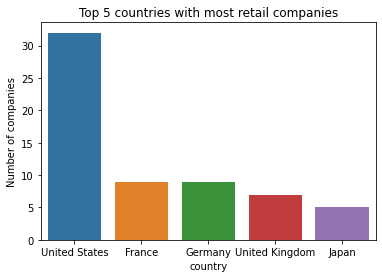

In [82]:
sns.barplot(data=top_5.head(5),x=top_5['country'],y=top_5['count'])
plt.title('Top 5 countries with most retail companies')
plt.ylabel('Number of companies')

USA has holds top place with 32 companies from top 100 companies. So we want focus on USA retail companies.

# List of USA retail companies

In [17]:
df_retail_usa=df_retail[df_retail['country']=='United States'].reset_index().drop('index',axis=1)

In [18]:
df_retail_usa.head()

,Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,country,state,0
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville",United States,Bentonville,None
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle",United States,Seattle,None
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah",United States,Issaquah,None
3,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta",United States,Atlanta,None
4,6,Kroger,Supermarket,131620,2.0%,"United States, Cincinnati",United States,Cincinnati,None


In [19]:
df_retail_usa=df_retail_usa.rename(columns={'Rank':'Global Rank'})

In [20]:
df_retail_usa=df_retail_usa.sort_values('Global Rank')

In [21]:
df_retail_usa.columns

Index(['Global Rank', 'Name', 'Dominant operational format',
       'Retail revenue (US$ millions)', 'Net profit margin', 'Headquarters',
       'country', 'state', '0'],
      dtype='object')

# Bar plot for Net profit margin of all USA companies

In [22]:
df_index=df_retail_usa[df_retail_usa['Net profit margin']=='...'].index

In [23]:
df_retail_usa=df_retail_usa.drop(index=df_index,axis=0)

In [24]:
df_retail_usa.head()

,Global Rank,Name,Dominant operational format,Retail revenue (US$ millions),Net profit margin,Headquarters,country,state,0
0,1,Walmart,Hypermarket/Supercenter/Superstore,559151,2.5%,"United States, Bentonville",United States,Bentonville,None
1,2,Amazon,"Non-Store,E-commerce",213573,5.5%,"United States, Seattle",United States,Seattle,None
2,3,Costco,Cash & Carry/Warehouse Club,166761,2.4%,"United States, Issaquah",United States,Issaquah,None
3,5,The Home Depot,Home Improvement,132110,9.7%,"United States, Atlanta",United States,Atlanta,None
4,6,Kroger,Supermarket,131620,2.0%,"United States, Cincinnati",United States,Cincinnati,None


In [25]:
df_retail_usa['Net profit margin'] = df_retail_usa['Net profit margin'].str.replace('%', '').astype('float')

In [26]:
top_5_retail=df_retail_usa.head(5)

Text(0.5, 1.0, 'Net profit margin percentage for top retail companies in USA')

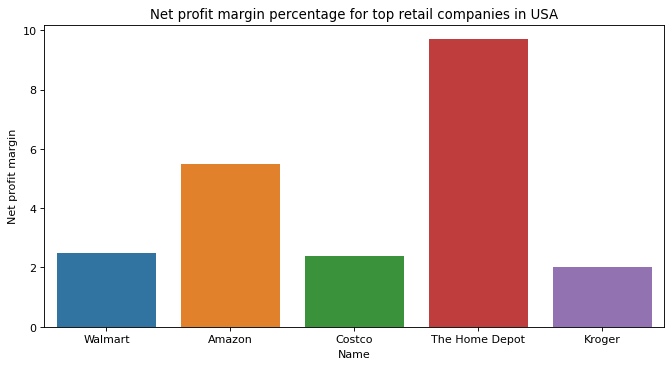

In [27]:
plt.figure(figsize=(10, 5), dpi=80)
sns.barplot(data=top_5_retail,x=top_5_retail['Name'],y=top_5_retail['Net profit margin'])
plt.title('Net profit margin percentage for top retail companies in USA')

Even though walmart is the top company based on revenue, Home depot has the highest net profit margin percentage.

Top 5 retail companies in USA based on Revenue

In [28]:
df_retail_usa['Name'].head(5)

0           Walmart
1            Amazon
2            Costco
3    The Home Depot
4            Kroger
Name: Name, dtype: object

scraping the data of each of these 5 companies.

# Walmart

In [29]:
# Scraping data of walmart revenue and other details from wikipedia
df_walmart=getdf('https://en.wikipedia.org/wiki/Walmart','wikitable float-left')

In [30]:
df_walmart['companyName']='Walmart'

In [31]:
df_walmart.columns=['Year', 'Revenue[151]in mil. US$', 'Net incomein mil. US$',
       'Total Assetsin mil. US$','Price perShare (US$)', 'Employees','Stores', 'companyName']

In [32]:
df_walmart['Net income change']=df_walmart['Net incomein mil. US$'].pct_change()

In [33]:
# splitting the date column only to get year
df_walmart[['Year','remove']]=df_walmart['Year'].str.split('[',expand = True)

In [34]:
df_walmart=df_walmart.drop(columns=['remove'],axis=1)

In [35]:
df_walmart.head()

,Year,Revenue[151]in mil. US$,Net incomein mil. US$,Total Assetsin mil. US$,Price perShare (US$),Employees,Stores,companyName,Net income change
0,1968,12.618754,0.481754,NaN,NaN,NaN,24,Walmart,NaN
1,1969,21.365081,0.605211,NaN,NaN,NaN,27,Walmart,0.256266
2,1970,30.862659,1.187764,NaN,NaN,1000.0,32,Walmart,0.962562
3,1971,44.286012,1.651599,15.331,NaN,1500.0,38,Walmart,0.390511
4,1972,78.014164,2.907354,28.463,NaN,2300.0,51,Walmart,0.760327


In [36]:
df_walmart=df_walmart.rename(columns={'Revenue[151]in mil. US$':'Revenue','Net incomein mil. US$':'NetIncome'})

# Barplot to see how the number of employees in walmart increases over the years.

Text(0.5, 1.0, 'Walmart number of employees change over the years')

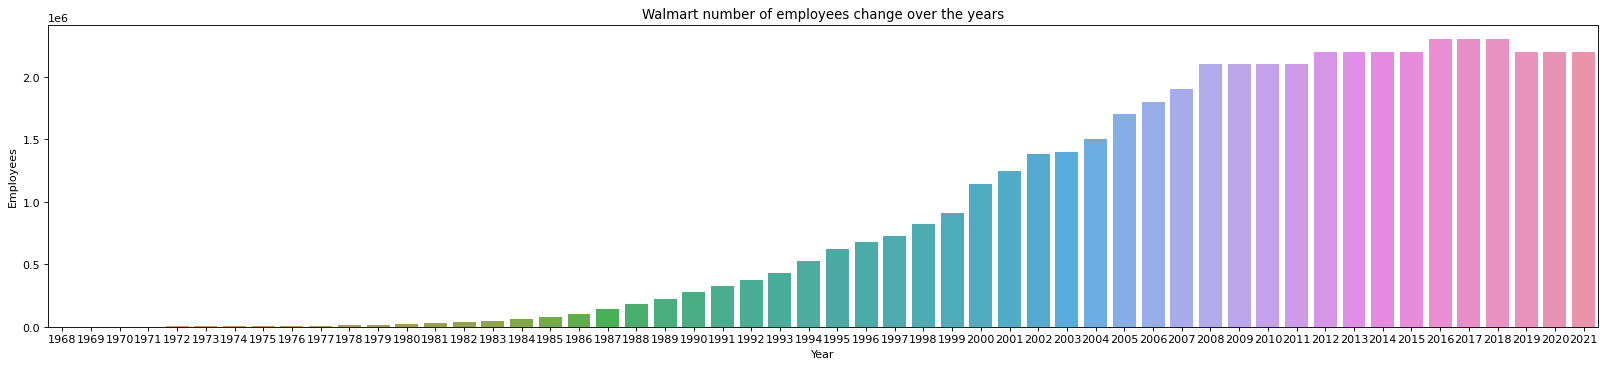

In [37]:
plt.figure(figsize=(25, 5), dpi=80)
sns.barplot(data=df_walmart,x='Year',y='Employees')
plt.title('Walmart number of employees change over the years')

# Scatter plot to see the number of employees changes as the number of stores increases.

<AxesSubplot:xlabel='Stores', ylabel='Employees'>

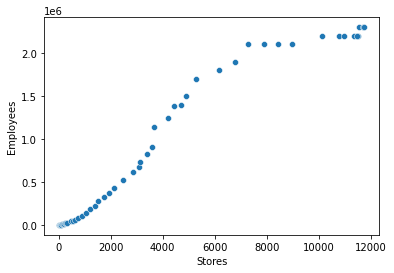

In [38]:
sns.scatterplot(data=df_walmart,x=df_walmart['Stores'],y=df_walmart['Employees'])


It seems like there is a positive correlation between stores vs employees. 
As the number of stores increases the number of employees to work in those stores increases.
Hence, we thought it's good to have a equation which can predict the number number of employeess given number of stores.
We also thought curve might be a better fit then regplot for these points.

In [39]:
df_wal_curve=df_walmart[['Stores','Employees']]

In [40]:
df_wal_curve=df_wal_curve.drop(index=[0,1],axis=0).reset_index()

In [41]:
X=df_wal_curve['Stores']
y=df_wal_curve['Employees']

In [42]:
a,b,c=np.polyfit(X,y,2)
a,b,c

(-0.01507453412360072, 383.71407970142934, -141545.86897356095)

In [43]:
num_stores=np.linspace(0,12000,2000)

In [44]:
pred_employees=a*num_stores**2+b*num_stores+c

Text(0.5, 1.0, 'Walmart stores vs employees')

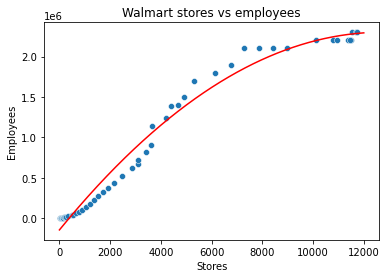

In [45]:
sns.scatterplot(data=df_wal_curve,x=df_wal_curve['Stores'],y=df_wal_curve['Employees'])
plt.plot(num_stores,pred_employees,color='red')
plt.title('Walmart stores vs employees')

In [46]:
display(stats.pearsonr(df_wal_curve.Stores, df_wal_curve['Employees']))

PearsonRResult(statistic=0.9701639057759264, pvalue=1.9680073633869205e-32)

# Amazon

In [47]:
#scrapping amazon's data from wikipedia
df_amazon=getdf('https://en.wikipedia.org/wiki/Amazon_(company)','wikitable float-left')

In [48]:
df_amazon.columns

Index(['Year', 'Revenue[151]in mil. US$', 'Net incomein mil. US$',
       'Total Assetsin mil. US$', 'Employees'],
      dtype='object')

In [49]:
df_amazon['companyName']='Amazon'

In [50]:
df_amazon=df_amazon.rename(columns={'Revenue[151]in mil. US$':'Revenue','Net incomein mil. US$':'NetIncome'})

In [51]:
df_amazon.head()

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Employees,companyName
0,1995[152],0.5,−0.3,1.1,NaN,Amazon
1,1996[152],16.0,−6,8.0,NaN,Amazon
2,1997[152],148.0,−28,149.0,614.0,Amazon
3,1998[153],610.0,−124,648.0,2100.0,Amazon
4,1999[153],1639.0,−720,2466.0,7600.0,Amazon


In [52]:
df_amazon[['Year','remove']]=df_amazon['Year'].str.split('[',expand = True)

In [53]:
df_amazon.Year=df_amazon.Year.astype(int)

Text(0.5, 1.0, 'Amazon number of employees change over the years')

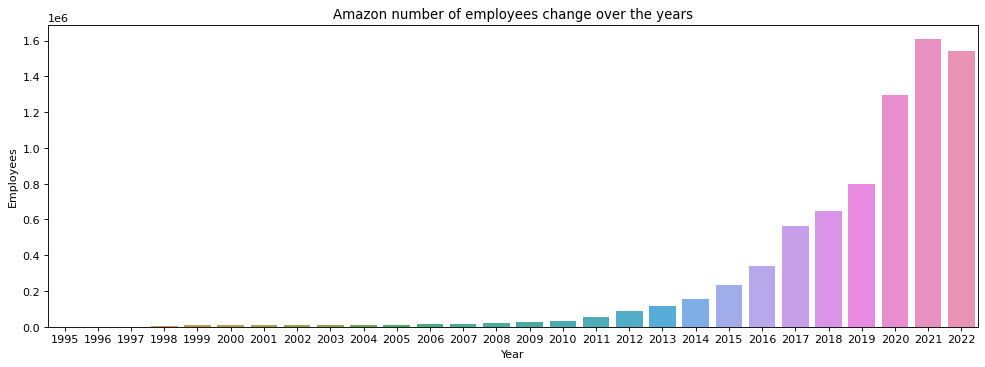

In [54]:
plt.figure(figsize=(15, 5), dpi=80)
sns.barplot(data=df_amazon,x='Year',y='Employees')
plt.title('Amazon number of employees change over the years')

In [55]:
df_amazon=df_amazon.dropna()

Text(0.5, 1.0, 'Amazon Revenue vs Employees')

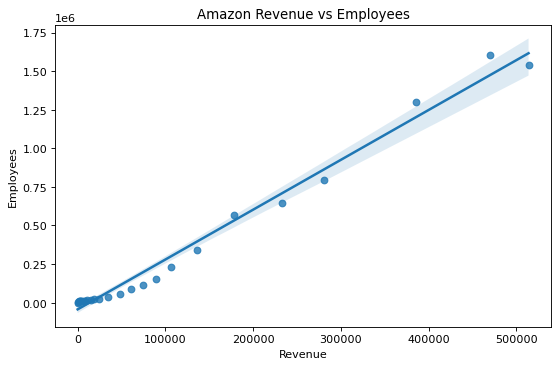

In [56]:
plt.figure(figsize=(8, 5), dpi=80)
sns.regplot(data=df_amazon,x='Revenue',y='Employees')
plt.title('Amazon Revenue vs Employees')

In [57]:
display(stats.pearsonr(df_amazon.Revenue, df_amazon['Employees']))

PearsonRResult(statistic=0.992707112149841, pvalue=1.439994306950723e-23)

# Costco

In [58]:
df_costco=getdf('https://en.wikipedia.org/wiki/Costco','wikitable float-left')

In [59]:
df_costco['companyName']='Costco'

In [60]:
df_costco=df_costco.rename(columns={'Revenuein mil. USD$':'Revenue','Net incomein mil. USD$':'NetIncome'})

In [61]:
df_costco['Net income change']=df_costco['NetIncome'].pct_change()

# Homedepot

In [62]:
df_homedepot=getdf('https://en.wikipedia.org/wiki/The_Home_Depot','wikitable float-left')

In [63]:
df_homedepot.head()

,Year,Revenuein mil. USD$,Net Incomein mil. USD$,Price per Sharein US$,Employees,Stores
0,2005,73094,5001.0,29.12,325000.0,1890.0
1,2006,77019,5838.0,28.12,345000.0,2042.0
2,2007,79022,5761.0,27.10,364000.0,2147.0
3,2008,77349,4395.0,19.86,331000.0,2234.0
4,2009,71288,2260.0,20.14,322000.0,2233.0


In [64]:
df_homedepot=df_homedepot.rename(columns={'Revenuein mil. USD$':'Revenue','Net Incomein mil. USD$':'NetIncome'})

In [65]:
df_homedepot['companyName']='HomeDepot'

In [66]:
df_homedepot['Net income change']=df_homedepot['NetIncome'].pct_change()

# Kroger

In [67]:
df_kroger=getdf('https://en.wikipedia.org/wiki/Kroger','wikitable float-left')

In [68]:
df_kroger

,Year,Revenuein mil. US$,Net incomein mil. US$,Total Assetsin mil. US$,Price per Sharein US$,Employees,Supermarkets,C-stores,Jewelers,Total stores
0,2006,60553,958,20482,10.64,290000,2507,791.0,428,3726
1,2007,66111,1115,21215,13.79,310000,2468,779.0,412,3659
2,2008,70336,1209,22293,13.36,323000,2486,782.0,394,3662
3,2009,76148,1249,23257,10.98,326000,2481,771.0,385,3637
4,2010,76609,70,23126,10.77,334000,2468,777.0,374,3619
5,2011,82049,1116,23505,11.69,338000,2460,784.0,361,3605
6,2012,90269,602,23476,11.82,339000,2435,791.0,348,3574
7,2013,96619,1497,24634,17.88,343000,2424,786.0,328,3538
8,2014,98375,1519,29281,24.41,375000,2640,786.0,320,3746
9,2015,108465,1728,30497,36.99,400000,2625,782.0,326,3733


In [69]:
df_kroger['companyName']='Kroger'

In [70]:
df_kroger=df_kroger.rename(columns={'Revenuein mil. US$':'Revenue','Net incomein mil. US$':'NetIncome'})

In [71]:
df_kroger.head()

,Year,Revenue,NetIncome,Total Assetsin mil. US$,Price per Sharein US$,Employees,Supermarkets,C-stores,Jewelers,Total stores,companyName
0,2006,60553,958,20482,10.64,290000,2507,791.0,428,3726,Kroger
1,2007,66111,1115,21215,13.79,310000,2468,779.0,412,3659,Kroger
2,2008,70336,1209,22293,13.36,323000,2486,782.0,394,3662,Kroger
3,2009,76148,1249,23257,10.98,326000,2481,771.0,385,3637,Kroger
4,2010,76609,70,23126,10.77,334000,2468,777.0,374,3619,Kroger


In [72]:
df_kroger['Net income change']=df_kroger['NetIncome'].pct_change()

# Comparing net income percentage change for Costco and HomeDepot:

In [73]:
df_concat_3=pd.concat([df_costco[['Year', 'Revenue', 'Net income change','companyName']],df_homedepot[['Year', 'Revenue', 'Net income change','companyName']],
                   df_kroger[['Year', 'Revenue', 'Net income change','companyName']]]).reset_index()

In [74]:
df_concat_3.head()

,index,Year,Revenue,Net income change,companyName
0,0,2005,52935,NaN,Costco
1,1,2006,60151,0.037629,Costco
2,2,2007,64400,-0.018132,Costco
3,3,2008,72483,0.184672,Costco
4,4,2009,71422,-0.153546,Costco


In [75]:
df_concat_3=df_concat_3.dropna()

'Costco mean: 0.11040352802898808'

'HomeDepot mean: 0.05896706343192117'

'Costco sd: 0.10410450905199398'

'HomeDepot sd: 0.19320690825908698'

Ttest_indResult(statistic=0.9532778472938894, pvalue=0.348067599369711)

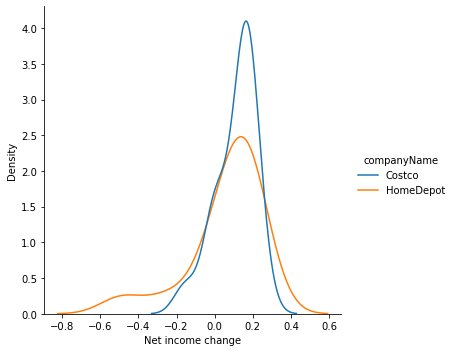

In [76]:
sns.displot(data=df_concat_3[df_concat_3.companyName.isin(['Costco','HomeDepot'])], x='Net income change', hue='companyName', kind='kde',common_norm=False)

display(f"Costco mean: {df_concat_3[df_concat_3.companyName == 'Costco']['Net income change'].mean()}")
display(f"HomeDepot mean: {df_concat_3[df_concat_3.companyName=='HomeDepot']['Net income change'].mean()}")
display(f"Costco sd: {df_concat_3[df_concat_3.companyName=='Costco']['Net income change'].std()}")
display(f"HomeDepot sd: {df_concat_3[df_concat_3.companyName=='HomeDepot']['Net income change'].std()}")

display(stats.ttest_ind(df_concat_3[df_concat_3.companyName == 'Costco']['Net income change'], df_concat_3[df_concat_3.companyName == 'HomeDepot']['Net income change']))

Cost has the higher net income change percentage than Home depot.
It means that the home depot net income is more subtle when compared to Costco.
we got the p value >0.05, which not statistically significant

# Comparing revenue Over the years for 5 companies

In [77]:
df_concat=pd.concat([df_walmart[['Year', 'Revenue', 'NetIncome','companyName']],df_amazon[['Year', 'Revenue', 'NetIncome','companyName']],
                   df_costco[['Year', 'Revenue', 'NetIncome','companyName']],df_homedepot[['Year', 'Revenue', 'NetIncome','companyName']],
                   df_kroger[['Year', 'Revenue', 'NetIncome','companyName']]]).reset_index()

In [78]:
df_concat['Year']=df_concat['Year'].astype(int)

Text(0.5, 1.0, 'Revenue change over the years for top 5 companies')

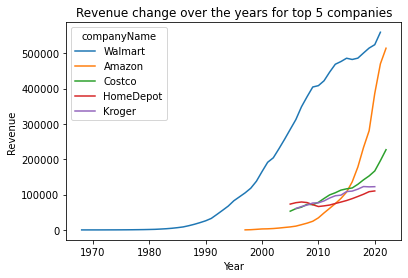

In [79]:
sns.lineplot(data=df_concat,x='Year',y='Revenue',hue='companyName')
plt.title('Revenue change over the years for top 5 companies')

Text(0.5, 1.0, 'Revenue change for top 5 companies(2005-2022)')

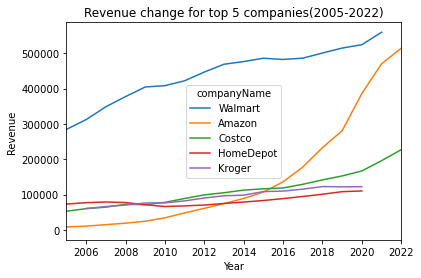

In [80]:
sns.lineplot(data=df_concat,x='Year',y='Revenue',hue='companyName')
plt.xlim([2005,2022])
plt.title('Revenue change for top 5 companies(2005-2022)')

When we consider the revenues of top 5 retail companies from 2005 to 2022, Walmart has the highest increasing revenue over the years.
Amazon revenue has increased over the years and it's significantly increased from 2019 to 2021 due to COVID-19 pandemic and people used to do more online shopping than in-store.

# Netincome over the years

In [84]:
df_concat=df_concat[df_concat.companyName.isin(['Costco','HomeDepot','Walmart','Kroger'])]

In [85]:
df_concat

,index,Year,Revenue,NetIncome,companyName
0,0,1968,12.618754,0.481754,Walmart
1,1,1969,21.365081,0.605211,Walmart
2,2,1970,30.862659,1.187764,Walmart
3,3,1971,44.286012,1.651599,Walmart
4,4,1972,78.014164,2.907354,Walmart
...,...,...,...,...,...
124,10,2016,109830.000000,2039,Kroger
125,11,2017,115337.000000,1975,Kroger
126,12,2018,122662.000000,1907,Kroger
127,13,2019,121852.000000,3110,Kroger


(2005.0, 2022.0)

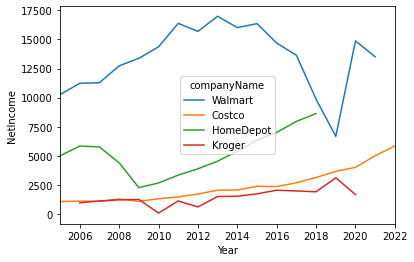

In [87]:
sns.lineplot(data=df_concat,x='Year',y='NetIncome',hue='companyName')
plt.xlim([2005,2022])

Due to data formatting issues, we were unable to include Amazon in our plotted data. However, we observed a significant decrease in net income for Walmart in 2019. Additionally, Home Depot had a continuous increase in net income from 2009 and was the top company in terms of net profit margin. Not including this in the report due to length issues.